In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from datetime import datetime
import requests
import pandas_datareader as pdr
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
# Function to Validate Date
def validateShift(shift):
    shift = int(shift)
    # Try Check on Format
    try:
        if 0 > shift <= 365:
            pass
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Please enter a whole number.")

In [4]:
# Pick a Start Date
date = "2016-01-01" #input("Pick a start date for your analysis (YYYY-MM-DD): ")

# Validate Correct Date Format
validate(date)

In [5]:
# Pick a Stock
stock_selection = "CME" #input("Pick a stock ticker for your analysis: ")

# Validate Correct Date Format
validateTick(stock_selection)

In [6]:
# Pick Shift
shift_selection = "1" #input("Pick how many days to shift your close values for your analysis: ")

# Validate Correct Date Format
validateShift(shift_selection)

In [7]:
#Function to Create Stocks
def stockCreation(date, stock_selection, days_shifted):
    
    # Read Stock Data
    globals()[stock_selection] = pdr.DataReader(f'{stock_selection}','yahoo',date)
    
    # Create Shifted Close Column
    globals()[stock_selection]["Shifted Close"] = globals()[stock_selection]["Adj Close"].shift(-int(days_shifted))
    
    # Drop Rows Without Shift Values
    globals()[stock_selection].drop(globals()[stock_selection].tail(int(days_shifted)).index, inplace = True) 
    
    # Empty List to Hold Profit or Loss
    profit_loss = []
    
    # Iterate Through DataFrame
    for x in range(len(globals()[stock_selection])):
        
        # Handle Profitable Days
        if globals()[stock_selection]["Shifted Close"][x] > globals()[stock_selection]["Adj Close"][x]:
            
            # Append "Profit" to Empty List
            profit_loss.append("Profit")
            
        # Handle Loss Days
        elif globals()[stock_selection]["Shifted Close"][x] < globals()[stock_selection]["Adj Close"][x]:
            
            # Append "Loss" to Empty List
            profit_loss.append("Loss")
            
        # Handle Push Days
        elif globals()[stock_selection]["Shifted Close"][x] == globals()[stock_selection]["Adj Close"][x]:
            
            # Append "Push" to Empty List
            profit_loss.append("Push")
    
    # Create Profit/Loss Column
    globals()[stock_selection]["Profit/Loss"] = profit_loss
    
    # Create Returns Column
    globals()[stock_selection]['Returns'] = np.log(globals()[stock_selection]['Adj Close'] / globals()[stock_selection]['Adj Close'].shift(1))
    
    # Iterate to Create STD Columns
    for x in range(5, 20, 5):
        
        # Create STD Column Based on Iteration
        col_name = 'std_' + str(x)
        
        # Add STD Column to DataFrame
        globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].rolling(window=x).std()

    # Iterate to Create MA Columns
    for x in range(10, 30, 5):
        
        # Create MA Column Based on Iteration
        col_name = 'ma_' + str(x)
        
        # Add MA Column to DataFrame
        globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].rolling(window=x).mean()

    # Iterate to Create % Change Columns
    for x in range(3, 12, 3):
        
        # Create % Change Column Based on Iteration
        col_name = 'pct_' + str(x)
        
        # Add % Change Column to DataFrame
        globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].pct_change().rolling(window=x).sum()

    # Create VMA 4 Column
    col_name = 'vma_4'
    
    # Add VMA 4 Column to DataFrame
    globals()[stock_selection][col_name] = globals()[stock_selection]['Volume'].rolling(4).mean()

    # Create Intraday Column
    col_name = 'co'
    
    # Add Intraday Column to DataFrame
    globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'] - globals()[stock_selection]['Open']
    
    # Drop All NaN's
    globals()[stock_selection].dropna(inplace=True)
    
    # Return DataFrame
    return globals()[stock_selection]

In [8]:
# ### Function to Create Stocks
# def stockCreation(date, stock_selection, days_shifted):
    
#     # Read Stock Data
#     globals()[stock_selection] = pdr.DataReader(f'{stock_selection}','yahoo',date)
    
#     # Create Shifted Close Column
#     globals()[stock_selection]["Shifted Close"] = globals()[stock_selection]["Adj Close"].shift(-int(days_shifted))
    
#     # Drop Rows Without Shift Values
#     globals()[stock_selection].drop(globals()[stock_selection].tail(int(days_shifted)).index, inplace = True) 
    
#     # Empty List to Hold Profit or Loss
#     profit_loss = []
    
#     # Iterate Through DataFrame
#     for x in range(len(globals()[stock_selection])):
        
#         # Save Adjusted Close Value
#         adj_close = globals()[stock_selection]["Adj Close"][x]
        
#         # Save Shifted Close Value
#         shifted_close = globals()[stock_selection]["Shifted Close"][x]
        
#         # Handle Returns 3x as Large as Open
#         if shifted_close > (3 * adj_close):
            
#             # Append Number 8
#             profit_loss.append(8)
            
#         # Handle Returns within 2x and 3x as Large as Open
#         elif (3 * adj_close) <= shifted_close > (2 * adj_close):
            
#             # Append Number 7
#             profit_loss.append(7)
            
#         # Handle Returns within 1.75x and 2x as Large as Open
#         elif (2 * adj_close) <= shifted_close > (1.75 * adj_close):
            
#             # Append Number 6 
#             profit_loss.append(6)
        
#         # Handle Returns within 1.5x and 1.75x as Large as Open
#         elif (1.75 * adj_close) <= shifted_close > (1.5 * adj_close):
            
#             # Append Number 5
#             profit_loss.append(5)
            
#         # Handle Returns within 1,25x and 1.5x as Large as Open
#         elif (1.5 * adj_close) <= shifted_close > (1.25 * adj_close):
            
#             # Append Number 4
#             profit_loss.append(4)
            
#         # Handle Returns within 1.1x and 1.25x as Large as Open
#         elif (1.25 * adj_close) <= shifted_close > (1.1 * adj_close):
            
#             # Append Number 3
#             profit_loss.append(3)
            
#         # Handle Returns within 1.05x and 1.1x as Large as Open
#         elif (1.1 * adj_close) <= shifted_close > (1.05 * adj_close):
            
#             # Append Number 2
#             profit_loss.append(2)
            
#         # Handle Returns within 1x and 1.05x as Large as Open
#         elif (1.05 * adj_close) <= shifted_close > (1 * adj_close):
            
#             # Append Number 1
#             profit_loss.append(1)
            
#         # Handle Returns within .95x and 1x as Small as Open
#         elif (1 * adj_close) <= shifted_close > (.95 * adj_close):
            
#             # Append Number 0
#             profit_loss.append(0)
        
#         # Handle Returns within .9x and .95x as Small as Open
#         elif (.95 * adj_close) <= shifted_close > (.9 * adj_close):
            
#             # Append Number -1
#             profit_loss.append(-1)
            
#         # Handle Returns within .75x and .9x as Small as Open
#         elif (.9 * adj_close) <= shifted_close > (.75 * adj_close):
            
#             # Append Number -2
#             profit_loss.append(-2)
            
#         # Handle Returns within .5x and .75x as Small as Open
#         elif (.75 * adj_close) <= shifted_close > (.5 * adj_close):
            
#             # Append Number -3
#             profit_loss.append(-3)
            
#         # Handle Returns within .25x and .5x as Small as Open
#         elif (.5 * adj_close) <= shifted_close > (.25 * adj_close):
            
#             # Append Number -4
#             profit_loss.append(-4)
            
#         # Handle Returns within .1x and .25x as Small as Open
#         elif (.25 * adj_close) <= shifted_close > (.1 * adj_close):
            
#             # Append Number -5
#             profit_loss.append(-5)
            
#         # Handle Returns within .05x and .1x as Small as Open
#         elif (.1 * adj_close) <= shifted_close > (.05 * adj_close):
            
#             # Append Number -6
#             profit_loss.append(-6)
        
#         # Handle Returns Smaller than .05x as Small as Open
#         elif shifted_close < (.05 * adj_close):
            
#             # Append Number -7
#             profit_loss.append(-7)
    
#     # Create Profit/Loss Column
#     globals()[stock_selection]["Profit/Loss"] = profit_loss
    
#     # Create Returns Column
#     globals()[stock_selection]['Returns'] = np.log(globals()[stock_selection]['Adj Close'] / globals()[stock_selection]['Adj Close'].shift(1))
    
#     # Iterate to Create STD Columns
#     for x in range(5, 20, 5):
        
#         # Create STD Column Based on Iteration
#         col_name = 'std_' + str(x)
        
#         # Add STD Column to DataFrame
#         globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].rolling(window=x).std()

#     # Iterate to Create MA Columns
#     for x in range(10, 30, 5):
        
#         # Create MA Column Based on Iteration
#         col_name = 'ma_' + str(x)
        
#         # Add MA Column to DataFrame
#         globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].rolling(window=x).mean()

#     # Iterate to Create % Change Columns
#     for x in range(3, 12, 3):
        
#         # Create % Change Column Based on Iteration
#         col_name = 'pct_' + str(x)
        
#         # Add % Change Column to DataFrame
#         globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'].pct_change().rolling(window=x).sum()

#     # Create VMA 4 Column
#     col_name = 'vma_4'
    
#     # Add VMA 4 Column to DataFrame
#     globals()[stock_selection][col_name] = globals()[stock_selection]['Volume'].rolling(4).mean()

#     # Create Intraday Column
#     col_name = 'co'
    
#     # Add Intraday Column to DataFrame
#     globals()[stock_selection][col_name] = globals()[stock_selection]['Adj Close'] - globals()[stock_selection]['Open']
    
#     # Drop All NaN's
#     globals()[stock_selection].dropna(inplace=True)
    
#     # Return DataFrame
#     return globals()[stock_selection]

In [9]:
# Create Stock
stockCreation(date, stock_selection, shift_selection)

,High,Low,Open,Close,Volume,Adj Close,Shifted Close,Profit/Loss,Returns,std_5,...,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-08,90.669998,87.000000,88.410004,90.190002,2758100.0,75.330887,77.936836,Profit,0.018351,1.218740,...,2.022289,73.756442,72.653080,72.354897,72.608648,0.009896,0.004898,0.044908,2910525.0,-13.079117
2016-02-09,93.809998,89.050003,89.050003,93.309998,3233500.0,77.936836,75.614868,Loss,0.034008,2.126921,...,2.423534,74.336102,73.053999,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167
2016-02-10,93.489998,90.440002,93.029999,90.529999,2133700.0,75.614868,74.604225,Loss,-0.030246,2.154174,...,2.382844,74.654331,73.406474,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131
2016-02-11,90.550003,88.320000,88.360001,89.320000,1952800.0,74.604225,76.132721,Profit,-0.013456,1.512457,...,1.967143,74.840592,73.814632,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775
2016-02-12,91.290001,89.510002,90.919998,91.150002,1691200.0,76.132721,75.765213,Loss,0.020281,1.253418,...,1.863000,74.949174,74.169889,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,193.669998,190.240005,192.940002,191.740005,2071100.0,191.740005,191.970001,Profit,0.001827,0.820621,...,4.700221,187.485001,187.432666,189.791500,189.844800,-0.001208,0.054433,0.044022,1625900.0,-1.199997
2021-02-09,195.539993,191.229996,193.000000,191.970001,2026300.0,191.970001,185.199997,Loss,0.001199,0.822300,...,4.683905,188.307001,187.417333,189.443000,190.351600,-0.008029,0.024269,0.072214,1808275.0,-1.029999
2021-02-10,192.190002,182.660004,191.119995,185.199997,2688300.0,185.199997,182.710007,Loss,-0.035903,3.217443,...,4.666078,188.948001,187.108666,188.628500,190.594800,-0.032238,-0.035378,0.016366,2131775.0,-5.919998


In [10]:
#create df for the stock with the chosen columns
stock_df = stockCreation(date, stock_selection, shift_selection) #[['Profit/Loss','Returns','Volume']] #.drop(columns=["High","Low","Open","Close","Shifted Close","Adj Close"]) ]
stock_df["Vol_Chg"] = stock_df['Volume'].pct_change()
stock_df.drop(columns=['Volume'], inplace=True)

profitLoss = []
for r in stock_df['Profit/Loss']:
    if r == 'Profit':
        profitLoss.append(1)
    else:
        profitLoss.append(0)
stock_df['Profit/Loss'] = profitLoss

stock_df.head()


,High,Low,Open,Close,Adj Close,Shifted Close,Profit/Loss,Returns,std_5,std_10,...,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,Vol_Chg
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-08,90.669998,87.000000,88.410004,90.190002,75.330887,77.936836,1,0.018351,1.218740,1.268820,...,73.756442,72.653080,72.354897,72.608648,0.009896,0.004898,0.044908,2910525.0,-13.079117,NaN
2016-02-09,93.809998,89.050003,89.050003,93.309998,77.936836,75.614868,0,0.034008,2.126921,1.699434,...,74.336102,73.053999,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167,0.172365
2016-02-10,93.489998,90.440002,93.029999,90.529999,75.614868,74.604225,0,-0.030246,2.154174,1.598326,...,74.654331,73.406474,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131,-0.340127
2016-02-11,90.550003,88.320000,88.360001,89.320000,74.604225,76.132721,1,-0.013456,1.512457,1.452542,...,74.840592,73.814632,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775,-0.084782
2016-02-12,91.290001,89.510002,90.919998,91.150002,76.132721,75.765213,0,0.020281,1.253418,1.509159,...,74.949174,74.169889,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277,-0.133961


In [11]:
#create df for risk-free market return (treasury bill), market-return(SP500)

tbond = pdr.DataReader('^IRX','yahoo',date)['Adj Close'].pct_change()

sp500 = pdr.DataReader('SPY','yahoo',date)['Adj Close'].pct_change()


In [12]:
tbond

Date
2016-01-04         NaN
2016-01-05    0.322581
2016-01-06    0.000000
2016-01-07   -0.073171
2016-01-08    0.000000
                ...   
2021-02-09    0.650000
2021-02-10    0.060606
2021-02-11    0.000000
2021-02-12    0.000000
2021-02-16    0.000000
Name: Adj Close, Length: 1277, dtype: float64

In [17]:
#conca

combined_df = pd.concat([stock_df, tbond, sp500], axis="columns", join='inner')
combined_df.head()

,High,Low,Open,Close,Adj Close,Shifted Close,Profit/Loss,Returns,std_5,std_10,...,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,Vol_Chg,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-08,90.669998,87.000000,88.410004,90.190002,75.330887,77.936836,1,0.018351,1.218740,1.268820,...,72.354897,72.608648,0.009896,0.004898,0.044908,2910525.0,-13.079117,NaN,-0.064748,-0.013461
2016-02-09,93.809998,89.050003,89.050003,93.309998,77.936836,75.614868,0,0.034008,2.126921,1.699434,...,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167,0.172365,0.153846,0.000054
2016-02-10,93.489998,90.440002,93.029999,90.529999,75.614868,74.604225,0,-0.030246,2.154174,1.598326,...,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131,-0.340127,-0.006667,-0.000863
2016-02-11,90.550003,88.320000,88.360001,89.320000,74.604225,76.132721,1,-0.013456,1.512457,1.452542,...,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775,-0.084782,-0.083893,-0.013008
2016-02-12,91.290001,89.510002,90.919998,91.150002,76.132721,75.765213,0,0.020281,1.253418,1.509159,...,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277,-0.133961,-0.010989,0.020617


In [35]:
combined_df['Profit/Loss'].unique()

array([1, 0], dtype=int64)

In [22]:
#rename columns for Tbill and SP500

columns = ['High', 'Low', 'Open', 'Close', 'Adj Close', 'Shifted Close',
       'Profit/Loss', 'Returns', 'std_5', 'std_10', 'std_15', 'ma_10', 'ma_15',
       'ma_20', 'ma_25', 'pct_3', 'pct_6', 'pct_9', 'vma_4', 'co', 'Vol_Chg',
       'Tbond', 'SPY']

combined_df.columns = columns



In [23]:
#data cleaning

combined_df.isnull().sum()

High             0
Low              0
Open             0
Close            0
Adj Close        0
Shifted Close    0
Profit/Loss      0
Returns          0
std_5            0
std_10           0
std_15           0
ma_10            0
ma_15            0
ma_20            0
ma_25            0
pct_3            0
pct_6            0
pct_9            0
vma_4            0
co               0
Vol_Chg          1
Tbond            0
SPY              0
dtype: int64

In [24]:
#data cleaning 

combined_df.dropna(inplace=True)
combined_df.isnull().sum()

High             0
Low              0
Open             0
Close            0
Adj Close        0
Shifted Close    0
Profit/Loss      0
Returns          0
std_5            0
std_10           0
std_15           0
ma_10            0
ma_15            0
ma_20            0
ma_25            0
pct_3            0
pct_6            0
pct_9            0
vma_4            0
co               0
Vol_Chg          0
Tbond            0
SPY              0
dtype: int64

In [26]:
combined_df

,High,Low,Open,Close,Adj Close,Shifted Close,Profit/Loss,Returns,std_5,std_10,...,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,Vol_Chg,Tbond,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-09,93.809998,89.050003,89.050003,93.309998,77.936836,75.614868,0,0.034008,2.126921,1.699434,...,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167,0.172365,0.153846,0.000054
2016-02-10,93.489998,90.440002,93.029999,90.529999,75.614868,74.604225,0,-0.030246,2.154174,1.598326,...,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131,-0.340127,-0.006667,-0.000863
2016-02-11,90.550003,88.320000,88.360001,89.320000,74.604225,76.132721,1,-0.013456,1.512457,1.452542,...,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775,-0.084782,-0.083893,-0.013008
2016-02-12,91.290001,89.510002,90.919998,91.150002,76.132721,75.765213,0,0.020281,1.253418,1.509159,...,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277,-0.133961,-0.010989,0.020617
2016-02-16,92.370003,90.089996,92.250000,90.709999,75.765213,76.967972,1,-0.004839,1.216553,1.527218,...,73.492503,73.086072,0.002295,0.025616,0.020246,2043200.0,-16.484787,0.416213,0.011111,0.016878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,193.669998,190.240005,192.940002,191.740005,191.740005,191.970001,1,0.001827,0.820621,5.358040,...,189.791500,189.844800,-0.001208,0.054433,0.044022,1625900.0,-1.199997,0.189330,-0.130435,0.007222
2021-02-09,195.539993,191.229996,193.000000,191.970001,191.970001,185.199997,0,0.001199,0.822300,5.351900,...,189.443000,190.351600,-0.008029,0.024269,0.072214,1808275.0,-1.029999,-0.021631,0.650000,-0.000666
2021-02-10,192.190002,182.660004,191.119995,185.199997,185.199997,182.710007,0,-0.035903,3.217443,4.381231,...,188.628500,190.594800,-0.032238,-0.035378,0.016366,2131775.0,-5.919998,0.326704,0.060606,-0.000436


In [27]:
# Assign Y Values
y = combined_df["Profit/Loss"].values
y = y.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [40]:
# Assign X Values
X = combined_df.copy()
X = X.drop(["Profit/Loss"], axis=1)
X

,High,Low,Open,Close,Adj Close,Shifted Close,Returns,std_5,std_10,std_15,...,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,Vol_Chg,Tbond,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-09,93.809998,89.050003,89.050003,93.309998,77.936836,75.614868,0.034008,2.126921,1.699434,2.423534,...,72.620506,72.763668,0.078829,0.044054,0.075449,3200800.0,-11.113167,0.172365,0.153846,0.000054
2016-02-10,93.489998,90.440002,93.029999,90.529999,75.614868,74.604225,-0.030246,2.154174,1.598326,2.382844,...,72.757486,72.802423,0.023321,0.017951,0.041389,2785025.0,-17.415131,-0.340127,-0.006667,-0.000863
2016-02-11,90.550003,88.320000,88.360001,89.320000,74.604225,76.132721,-0.013456,1.512457,1.452542,1.967143,...,72.972562,72.815453,-0.008565,0.001331,-0.003668,2519525.0,-13.755775,-0.084782,-0.083893,-0.013008
2016-02-12,91.290001,89.510002,90.919998,91.150002,76.132721,75.765213,0.020281,1.253418,1.509159,1.863000,...,73.241928,72.936396,-0.022671,0.056159,0.021383,2252800.0,-14.787277,-0.133961,-0.010989,0.020617
2016-02-16,92.370003,90.089996,92.250000,90.709999,75.765213,76.967972,-0.004839,1.216553,1.527218,1.633340,...,73.492503,73.086072,0.002295,0.025616,0.020246,2043200.0,-16.484787,0.416213,0.011111,0.016878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,193.669998,190.240005,192.940002,191.740005,191.740005,191.970001,0.001827,0.820621,5.358040,4.700221,...,189.791500,189.844800,-0.001208,0.054433,0.044022,1625900.0,-1.199997,0.189330,-0.130435,0.007222
2021-02-09,195.539993,191.229996,193.000000,191.970001,191.970001,185.199997,0.001199,0.822300,5.351900,4.683905,...,189.443000,190.351600,-0.008029,0.024269,0.072214,1808275.0,-1.029999,-0.021631,0.650000,-0.000666
2021-02-10,192.190002,182.660004,191.119995,185.199997,185.199997,182.710007,-0.035903,3.217443,4.381231,4.666078,...,188.628500,190.594800,-0.032238,-0.035378,0.016366,2131775.0,-5.919998,0.326704,0.060606,-0.000436


In [29]:
# Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
#define scaler and fit
X_scaler = StandardScaler()

X_scaler.fit(X_train)


StandardScaler()

In [31]:
#transform train and test

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled =X_scaler.transform(X_test)

In [41]:
X_test_scaled.shape

(313, 22)

In [37]:
# load tensorflow library and define the model

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(12, input_dim=22, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [38]:
#compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
#fit the model

mod = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 5/50
30/30 [==============================] - 0s 997us/step - loss: 7.9382 - accuracy: 0.4510
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 8/50
30/30 [==============================] - 0s 997us/step - loss: 7.9382 - accuracy: 0.4510
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 7.9382 - accuracy: 0.4510
Epoch 11/50
30/

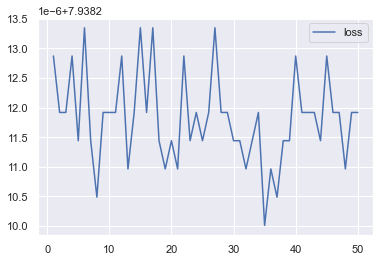

In [44]:
 # Create a dataframe with the history dictionary
    
df_plot = pd.DataFrame(mod.history, index=range(1, len(mod.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

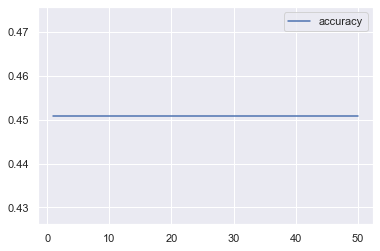

In [45]:
# Plot the accuracy
df_plot.plot(y="accuracy")

In [47]:
 # Evaluate the model fit with linear dummy data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.7815 - accuracy: 0.5080
Loss: 0.781456708908081, Accuracy: 0.5079872012138367


In [76]:
# Make predictions
import tensorflow as tf


predicted = model.predict(X_test)


In [77]:
len(predicted.flatten())

313

In [78]:
#list(y_test.flatten())

In [79]:
#list(predicted.flatten())

In [80]:

# predicted = X_scaler.inverse_transform(predicted).flatten().tolist()
predicted = list((predicted.flatten()))
results = pd.DataFrame({
    "Actual": list(y_test.flatten()),
    "Predicted": predicted
})
results.head(10)

,Actual,Predicted
0,1,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,1,1.0
5,1,1.0
6,0,1.0
7,1,1.0
8,0,1.0
9,1,1.0


In [81]:

predicteddf = pd.DataFrame(predicted)
from sklearn.metrics import classification_report
print(classification_report(list(y_test.flatten()), predicteddf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.51      1.00      0.67       159

    accuracy                           0.51       313
   macro avg       0.25      0.50      0.34       313
weighted avg       0.26      0.51      0.34       313



In [82]:
predicted

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [ ]:
from sklearn.svm import SVC

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")